In [79]:
import pandas as pd
from matplotlib.pyplot import subplots

In [73]:
Auto = pd.read_csv('./Auto.csv').dropna();
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


qualitative vs quantitavive columns

mpg                 quantitavive 
cylinders           quantitavive or qualitative
displacement        quantitavive
horsepower          quantitavive
weight              quantitavive
acceleration        quantitavive
year                quantitavive or qualitative
origin                              qualitative (most likely)
name                                qualitative

In [53]:
for col_name in ['cylinders', 'year', 'origin', 'name']:
    column = Auto[col_name]
    format = '{0: >10}: {1} ... {2}'.format(column.name, column.min(), column.max())
    print(format)

 cylinders: 3 ... 8
      year: 70 ... 82
    origin: 1 ... 3
      name: amc ambassador brougham ... vw rabbit custom


In [ ]:
for col_name in ['cylinders', 'year', 'origin']:
    column = Auto[col_name]
    format = '{0: >10}: mean is {1: >10}, std. dev. is {2:.2f}'.format(column.name, round(column.mean(), 2), column.std())
    print(format)

 cylinders: mean is       5.46, std. dev. is 1.70
      year: mean is      75.99, std. dev. is 3.69
    origin: mean is       1.57, std. dev. is 0.80


In [78]:
my_slice = pd.concat([Auto[0:11], Auto[86:]])
# 397 rows - 322 rows = 75 rows = 85-10

for col_name in ['cylinders', 'year', 'origin']:
    column = my_slice[col_name]
    format = '{0: >10}: new mean is {1: >10}, new std. dev. is {2:.2f}'.format(column.name, round(column.mean(), 2), column.std())
    print(format)

 cylinders: new mean is       5.38, new std. dev. is 1.66
      year: new mean is      77.12, new std. dev. is 3.15
    origin: new mean is        1.6, new std. dev. is 0.82


/tmp/ipykernel_31742/600862262.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_ex['weight_to_horsepower'] =  auto_ex['weight'] / pd.to_numeric(auto_ex['horsepower'])


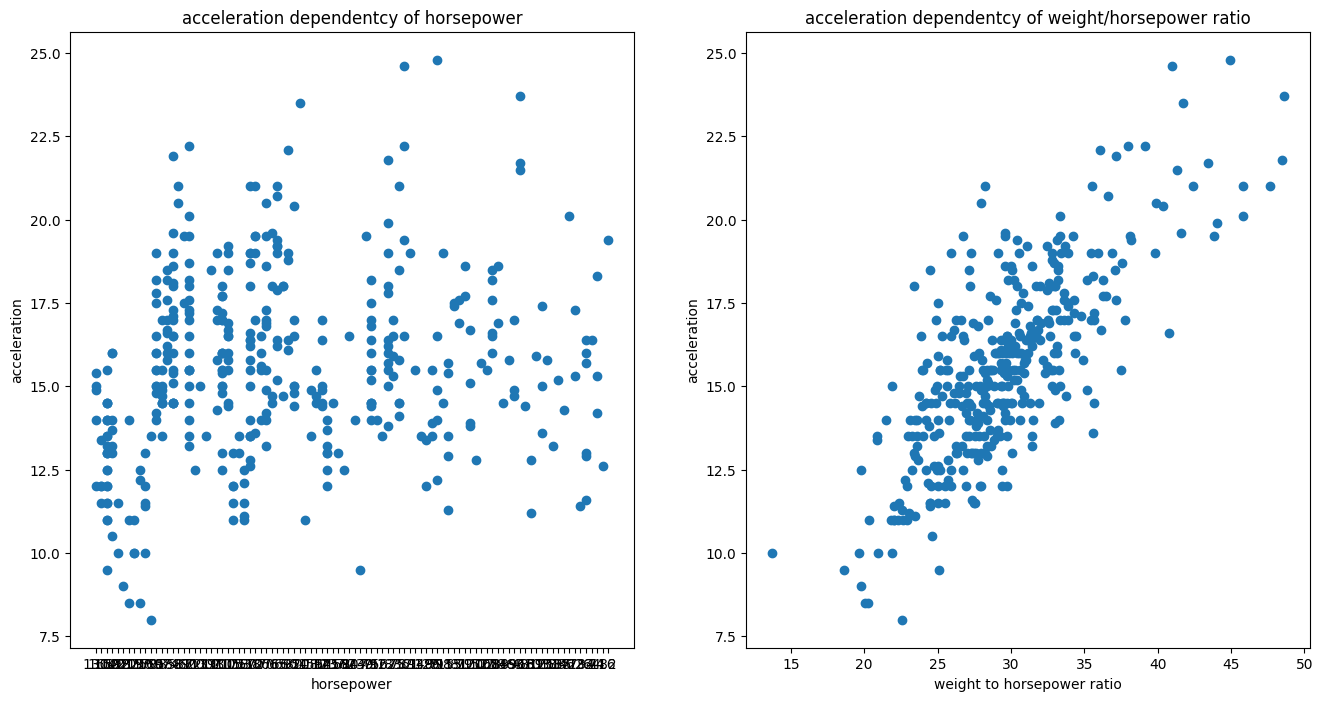

In [ ]:
# 9.e
# investigate acceleration


fig, axes = subplots(ncols=2, figsize=(16, 8))

x1 = Auto['horsepower']
y1 = Auto['acceleration']
axes[0].set_xlabel("horsepower")
axes[0].set_ylabel("acceleration")
axes[0].set_title("acceleration dependentcy of horsepower")
axes[0].scatter(x1, y1, marker='o');

# filter out rows with unknown horsepower
auto_ex = Auto[Auto['horsepower'].str.isnumeric()]
# create new column "weight_to_horsepower" 
auto_ex['weight_to_horsepower'] =  auto_ex['weight'] / pd.to_numeric(auto_ex['horsepower'])

x2 = auto_ex['weight_to_horsepower']
y2 = auto_ex['acceleration']
axes[1].set_xlabel("weight to horsepower ratio")
axes[1].set_ylabel("acceleration")
axes[1].set_title("acceleration dependentcy of weight/horsepower ratio")
axes[1].scatter(x2, y2, marker='o');

#
# conclusion: there is a clear linear-like dependency between acceleration and weight/horsepower ratio:
#             acceleration is monotonically increasing as the ratio increases

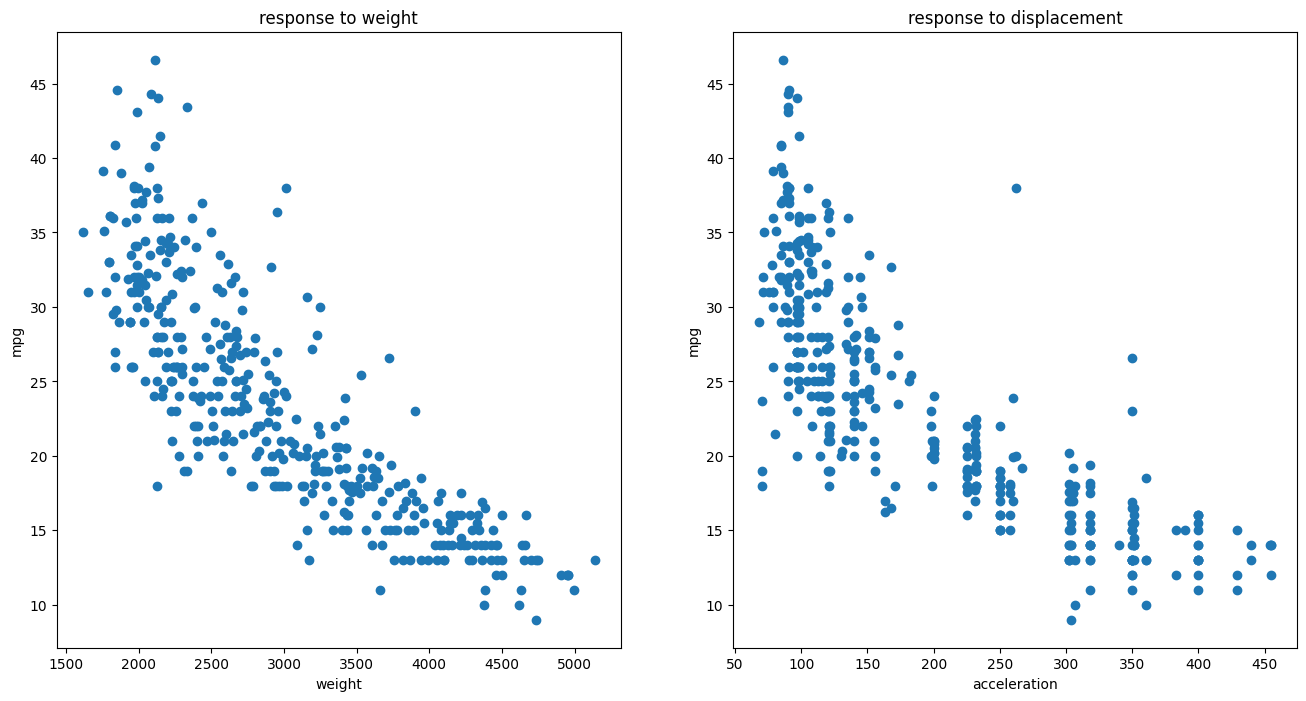

In [ ]:
# (f)

fig, axes = subplots(ncols=2, figsize=(16, 8))

x1 = Auto['weight']
y1 = Auto['mpg']
axes[0].set_xlabel("weight")
axes[0].set_ylabel("mpg")
axes[0].set_title("response to weight")
axes[0].scatter(x1, y1, marker='o');
# good correlation with weight - heavy car can drive less miles with 1 gallon

x2 = Auto['displacement']
y2 = Auto['mpg']
axes[1].set_xlabel("acceleration")
axes[1].set_ylabel("mpg")
axes[1].set_title("response to displacement")
axes[1].scatter(x2, y2, marker='o');
# good correlation with displayment - can with large cilynders volume will drive less miles with 1 gallon